In [25]:
# import neessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.covariance import EllipticEnvelope
import pickle
from sklearn.preprocessing import StandardScaler


# Data Analysis

In [30]:
# load data
df_satellite_to_append = []
df_solar_to_append = []
df_wind_to_append = []

for farm in [1, 2, 3, 4, 5]:
    satellite_to_append = pd.read_csv(f"data/solar/enlitia_satellite_{farm}_data.csv")
    solar_to_append = pd.read_csv(f"data/solar/enlitia_solar_farm_{farm}_data.csv")
    wind_to_append = pd.read_csv(f"data/wind/enlitia_wind_farm_{farm}_data.csv")
    
    df_satellite_to_append.append(satellite_to_append)
    df_solar_to_append.append(solar_to_append)
    df_wind_to_append.append(wind_to_append)

df_satellite = pd.concat(df_satellite_to_append, ignore_index=True)
df_solar = pd.concat(df_solar_to_append, ignore_index=True)
df_wind = pd.concat(df_wind_to_append, ignore_index=True)

print("Satellite DataFrame:\n", df_satellite.head(),"\n")
print("Solar DataFrame:\n", df_solar.head(),"\n")
print("Wind DataFrame:\n", df_wind.head(),"\n")


Satellite DataFrame:
    satellite_id              read_at  global_tilted_irradiance  \
0             1  2022-01-01 00:00:00                       0.0   
1             1  2022-01-01 00:10:00                       0.0   
2             1  2022-01-01 00:20:00                       0.0   
3             1  2022-01-01 00:30:00                       0.0   
4             1  2022-01-01 00:40:00                       0.0   

   global_horizontal_irradiance  temperature  cloud_cover  
0                           0.0         13.0          1.4  
1                           0.0         12.9          2.8  
2                           0.0         12.9          2.8  
3                           0.0         12.9          1.4  
4                           0.0         12.8          6.6   

Solar DataFrame:
    asset_id              read_at  ac_power  ac_voltage  ac_current   dc_power  \
0        11  2022-01-01 07:40:00       0.0         4.0       0.000    0.00000   
1        11  2022-01-01 07:50:00       

In [31]:
dfs_dict = {
    "Satellite" : df_satellite,
    "Solar": df_solar,
    "Wind" : df_wind
}

for key, value in dfs_dict.items():
    print(f"Information of {key} df")
    print(value.info(),"\n")

Information of Satellite df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476012 entries, 0 to 476011
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   satellite_id                  476012 non-null  int64  
 1   read_at                       476012 non-null  object 
 2   global_tilted_irradiance      476012 non-null  float64
 3   global_horizontal_irradiance  476012 non-null  float64
 4   temperature                   476012 non-null  float64
 5   cloud_cover                   476012 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 21.8+ MB
None 

Information of Solar df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081774 entries, 0 to 4081773
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   asset_id    int64  
 1   read_at     object 
 2   ac_power    float64
 3   ac_voltage  float64
 4   ac_current  float64
 

In [32]:
# Store dfs_dict in a pickle format

with open(f"intermediate/dfs_dict.pickle", "wb") as f:
    pickle.dump(dfs_dict, f)

In [33]:
for key, value in dfs_dict.items():
    print(f"Description for {key} df: \n {value.describe()} \n")

Description for Satellite df: 
         satellite_id  global_tilted_irradiance  global_horizontal_irradiance  \
count  476012.000000             476012.000000                 476012.000000   
mean        2.955094                209.564561                    183.423351   
std         1.397527                312.788216                    271.583113   
min         1.000000                  0.000000                      0.000000   
25%         2.000000                  0.000000                      0.000000   
50%         3.000000                  0.000000                      0.000000   
75%         4.000000                348.000000                    311.000000   
max         5.000000               1113.000000                   1022.000000   

         temperature    cloud_cover  
count  476012.000000  476012.000000  
mean       15.583318      24.080120  
std         5.670874      28.409902  
min        -2.000000       0.000000  
25%        12.000000       0.000000  
50%        15.00000

we can see by the count of values that a significant amount of them are null in the ac_voltage and ac_current (solar df)

In [34]:
for key, value in dfs_dict.items():
    print(f"NAs count for {key}")
    print(value.isna().sum(), "\n")

NAs count for Satellite
satellite_id                    0
read_at                         0
global_tilted_irradiance        0
global_horizontal_irradiance    0
temperature                     0
cloud_cover                     0
dtype: int64 

NAs count for Solar
asset_id          0
read_at           0
ac_power          0
ac_voltage    99722
ac_current    99722
dc_power          0
dc_voltage        0
dc_current        0
dtype: int64 

NAs count for Wind
asset_id                0
read_at                 0
wind_speed              0
wind_direction          0
power_average           0
rotation_average        0
exterior_temperature    1
nacelle_temperature     1
dtype: int64 



### Null values treatment

#### Solar df

In [35]:
df_solar_only_na = df_solar[df_solar["ac_voltage"].isna()]
print(df_solar_only_na)
#df_solar_only_na.to_csv("intermediate/solar_only_nas.csv")

         asset_id              read_at  ac_power  ac_voltage  ac_current  \
3109038       411  2022-01-01 07:40:00       0.0         NaN         NaN   
3109039       411  2022-01-01 07:50:00       0.0         NaN         NaN   
3109040       411  2022-01-01 08:00:00       0.0         NaN         NaN   
3109041       411  2022-01-01 08:10:00     259.0         NaN         NaN   
3109042       411  2022-01-01 08:20:00     531.0         NaN         NaN   
...           ...                  ...       ...         ...         ...   
3208755       412  2024-01-09 13:20:00    1857.0         NaN         NaN   
3208756       412  2024-01-09 13:30:00    2015.0         NaN         NaN   
3208757       412  2024-01-09 13:40:00    2114.0         NaN         NaN   
3208758       412  2024-01-09 13:50:00    1459.0         NaN         NaN   
3208759       412  2024-01-09 14:00:00    4352.0         NaN         NaN   

         dc_power  dc_voltage  dc_current  
3109038       0.0      482.74       0.000  

it's possible to see that some rows dont have values for the columns ac_voltage and ac_current

In [36]:
df_solar_only_na["asset_id"].unique()

array([411, 412])

In [37]:
print(f"All rows for asset 411: {df_solar[df_solar['asset_id']==411].shape[0]}")
print(f"All rows for asset 412: {df_solar[df_solar['asset_id']==412].shape[0]}\n")
print(f"Null rows for asset 411: {df_solar_only_na[df_solar_only_na['asset_id']==411].shape[0]}")
print(f"Null rows for asset 412: {df_solar_only_na[df_solar_only_na['asset_id']==412].shape[0]}")

All rows for asset 411: 49925
All rows for asset 412: 49797

Null rows for asset 411: 49925
Null rows for asset 412: 49797


So, all rows for assets 411 and 412 have NAs in the cols ac_current and ac_voltage

#### Fill NAs

AC power = AC current * AC voltage

ac_voltage < 220 and NAs = 230 as is the common voltage in Europe, assuming short-circuits not happening in the period in analysis

ac_current = ac_power/ac_voltage

In [38]:
df_solar.loc[(df_solar["ac_voltage"] < 220) | df_solar["ac_voltage"].isna(), "ac_voltage"] = 230
df_solar.loc[df_solar["ac_current"].isna(), "ac_current"] = df_solar.loc[df_solar["ac_current"].isna(), "ac_power"]/df_solar.loc[df_solar["ac_current"].isna(), 
                                                                                                                                 "ac_voltage"]
df_solar[(df_solar["asset_id"]==411) | (df_solar["asset_id"]==412)]

,asset_id,read_at,ac_power,ac_voltage,ac_current,dc_power,dc_voltage,dc_current
3109038,411,2022-01-01 07:40:00,0.0,230.0,0.000000,0.0,482.74,0.000
3109039,411,2022-01-01 07:50:00,0.0,230.0,0.000000,0.0,519.87,0.000
3109040,411,2022-01-01 08:00:00,0.0,230.0,0.000000,0.0,527.25,0.000
3109041,411,2022-01-01 08:10:00,259.0,230.0,1.126087,188.0,456.33,0.419
3109042,411,2022-01-01 08:20:00,531.0,230.0,2.308696,349.0,479.84,0.733
...,...,...,...,...,...,...,...,...
3208755,412,2024-01-09 13:20:00,1857.0,230.0,8.073913,1877.0,518.82,3.621
3208756,412,2024-01-09 13:30:00,2015.0,230.0,8.760870,2047.0,537.71,3.808
3208757,412,2024-01-09 13:40:00,2114.0,230.0,9.191304,2136.0,543.88,3.929
3208758,412,2024-01-09 13:50:00,1459.0,230.0,6.343478,1465.0,511.86,2.864


#### Wind df

In [39]:
df_wind[df_wind["exterior_temperature"].isna()]

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature
1043621,19,2022-12-01 21:00:00,12.5,-273.0,1962.0,17.8,NaN,NaN


In [40]:
df_wind['read_at'] = pd.to_datetime(df_wind['read_at'])
filtered_df = df_wind[(df_wind['asset_id'] == 19) & 
                 (df_wind['read_at'].dt.time == pd.to_datetime('21:00:00').time()) & 
                 (df_wind['read_at'].dt.month == 12) & 
                 (df_wind['read_at'].dt.day == 1)] 
filtered_df

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature
991062,19,2021-12-01 21:00:00,12.0,-52.0,2047.0,17.97,2.0,5.0
1043621,19,2022-12-01 21:00:00,12.5,-273.0,1962.0,17.80,NaN,NaN


In [41]:
df_wind.loc[df_wind["exterior_temperature"].isna(), "exterior_temperature"] = filtered_df["exterior_temperature"].median()
df_wind.loc[df_wind["nacelle_temperature"].isna(), "nacelle_temperature"] = filtered_df["nacelle_temperature"].median()

In [42]:
df_wind[(df_wind['asset_id'] == 19) & 
                 (df_wind['read_at'].dt.time == pd.to_datetime('21:00:00').time()) & 
                 (df_wind['read_at'].dt.month == 12) & 
                 (df_wind['read_at'].dt.day == 1)] 

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature
991062,19,2021-12-01 21:00:00,12.0,-52.0,2047.0,17.97,2.0,5.0
1043621,19,2022-12-01 21:00:00,12.5,-273.0,1962.0,17.80,2.0,5.0


### Check duplicated rows

In [43]:
for key, value in dfs_dict.items():
    print(f"Duplicated values for the {key} df: {value[value.duplicated()]}")

Duplicated values for the Satellite df: Empty DataFrame
Columns: [satellite_id, read_at, global_tilted_irradiance, global_horizontal_irradiance, temperature, cloud_cover]
Index: []
Duplicated values for the Solar df: Empty DataFrame
Columns: [asset_id, read_at, ac_power, ac_voltage, ac_current, dc_power, dc_voltage, dc_current]
Index: []
Duplicated values for the Wind df: Empty DataFrame
Columns: [asset_id, read_at, wind_speed, wind_direction, power_average, rotation_average, exterior_temperature, nacelle_temperature]
Index: []


There is no duplicated values to handle

### Check if the variables present multicolinearity

In [56]:
filtered_dfs_dict = {}

for key, df in dfs_dict.items():
    filtered_df = df.iloc[:, 2:]
    filtered_dfs_dict[key] = filtered_df

with open(f"intermediate/filtered_dfs_dict.pickle", "wb") as f:
    pickle.dump(filtered_dfs_dict, f)

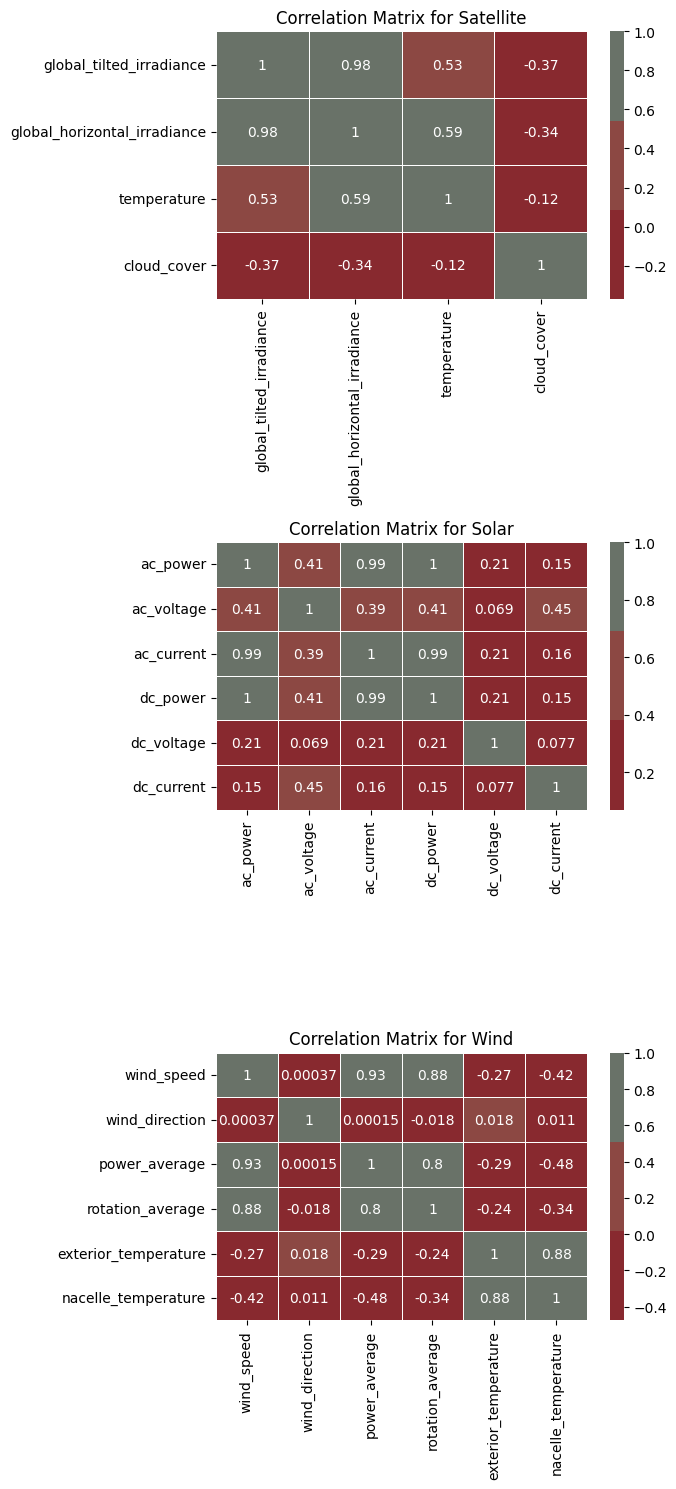

In [45]:
# Calculate the correlation matrix
my_colors = ['#88292F', '#8C4843', '#697268']
sns.set_palette(my_colors)

corr_matrix_dict = {}

for key, value in filtered_dfs_dict.items():
    corr_matrix = value.corr()
    corr_matrix_dict[key] = corr_matrix

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(7, 15))

plot = 1
for key, corr in corr_matrix_dict.items():
    plt.subplot(3, 1, plot)
    sns.heatmap(corr, annot=True, cmap=my_colors, linewidths=0.5)
    plt.title(f'Correlation Matrix for {key}')
    plot += 1
plt.tight_layout()
plt.show()

For Solar: makes sense to explore dc voltage vs dc current, because they have low correlation between them, so they give different knowledge. 

Doesn't make sense to explore dc variables against ac variables because dc gives information about the inverter (what actually matters) and ac about the grid.

For Wind: explore wind speed vs power average;

Also explore wind exterior temperature vs power average

NOTE: A nacelle is a cover housing that houses all of the generating components in a wind turbine, including the generator, gearbox, drive train, and brake assembly.

### Explore relationships between data variables 
#### and 
### Check outliers

In [46]:
# filtered_satellite_df = filtered_dfs_dict["Satellite"]
# filtered_solar_df = filtered_dfs_dict["Solar"]
# filtered_wind_df = filtered_dfs_dict["Wind"]


Boxplots for the filtered Satellite df:


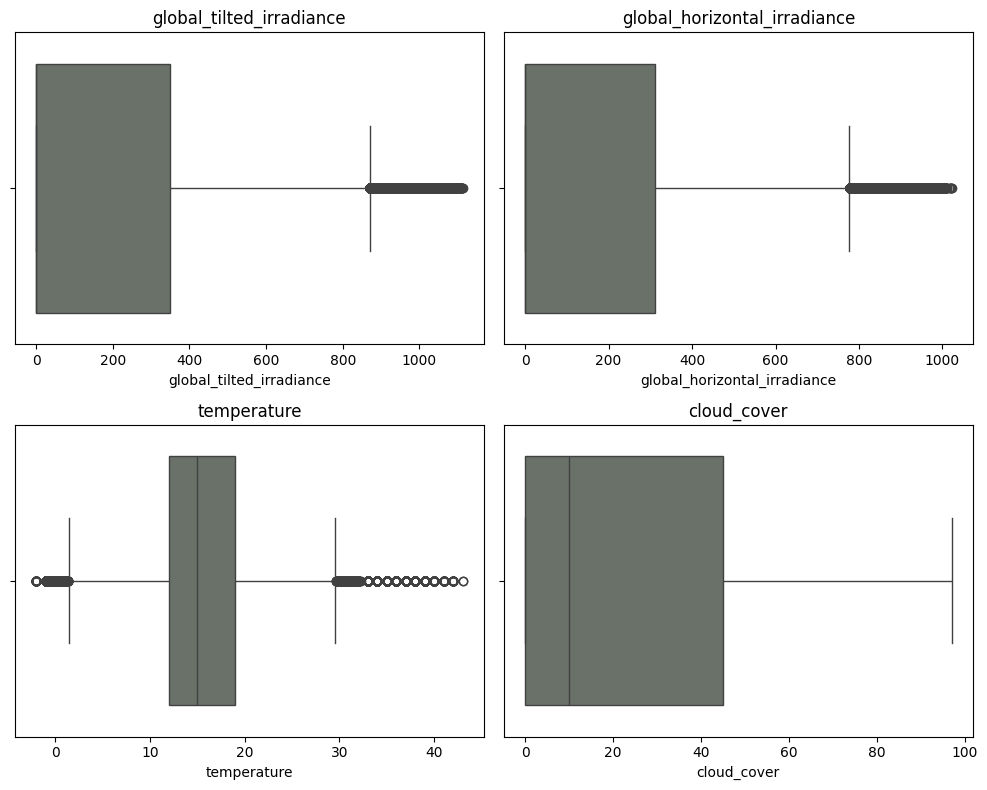


Boxplots for the filtered Solar df:


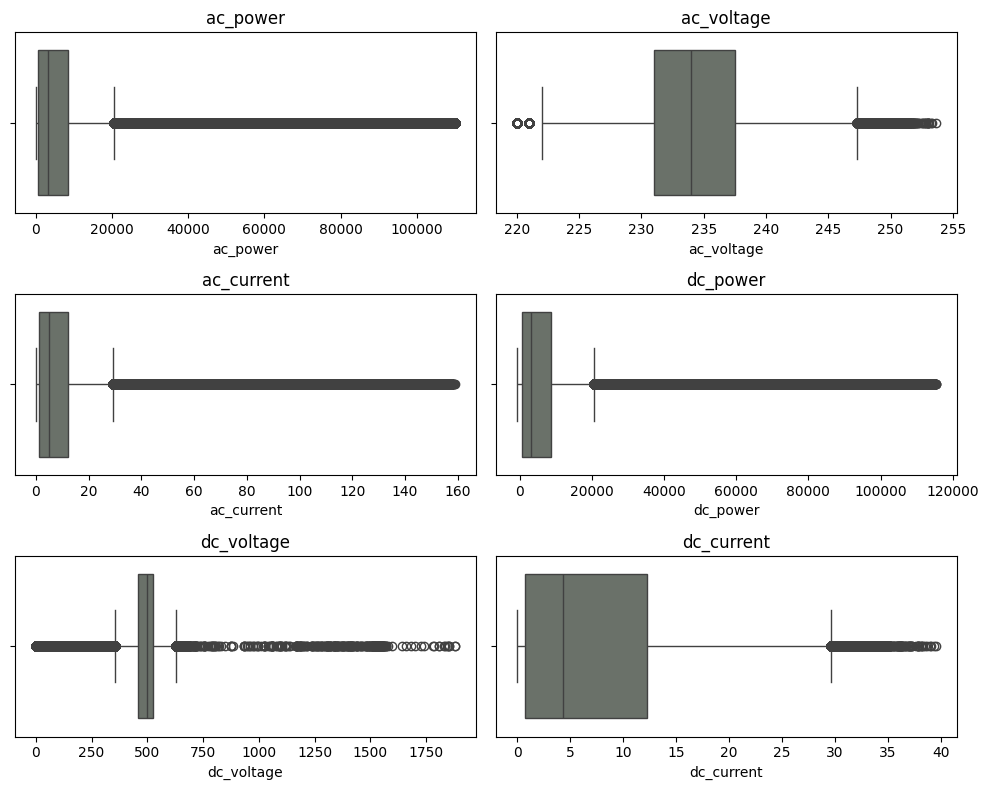


Boxplots for the filtered Wind df:


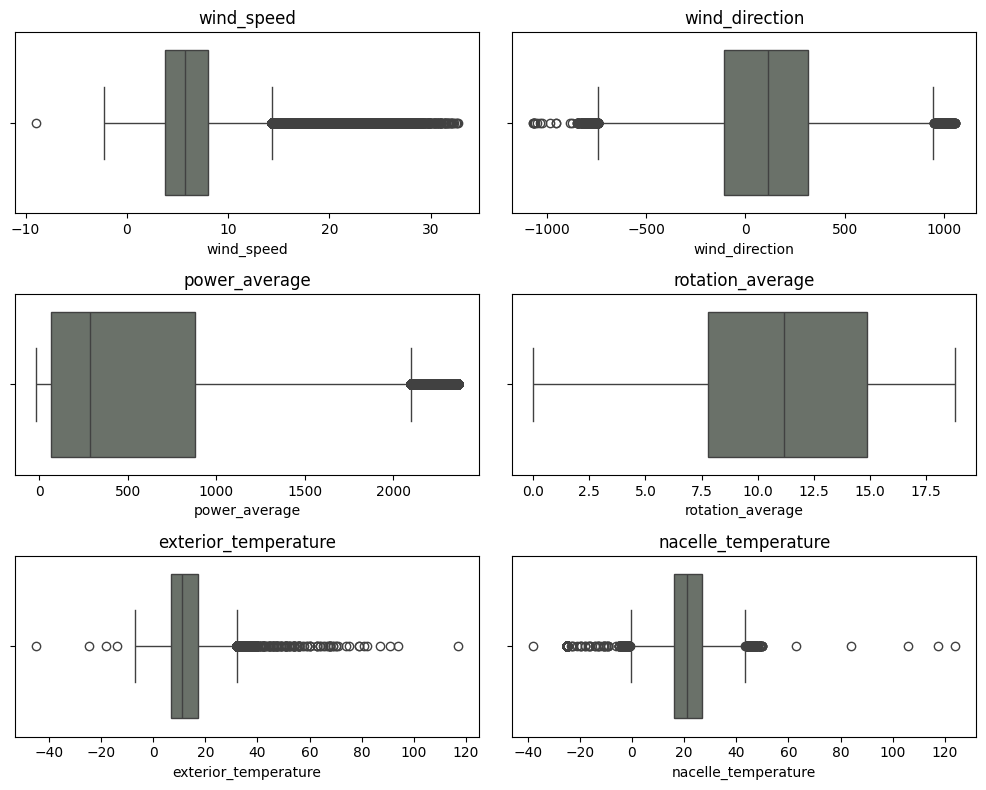

In [47]:
for key, value in filtered_dfs_dict.items():
    print(f"\nBoxplots for the filtered {key} df:")
    num_cols = len(value.columns)
    num_rows = (num_cols + 1) // 2  
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, 8))

    axes = axes.flatten()
    
    for i, feature in enumerate(value.columns):
        if i < num_cols:  
            sns.boxplot(x=value[feature], color='#697268', ax=axes[i])
            axes[i].set_title(feature)  
    plt.tight_layout() 
    plt.show()


However it seems to exist multiple outliers, this variables don't have "limits" or values that are more common than others (except maybe the ac_voltage), so we'll have to check for outliers in another way

## Solar

visualize the normal behavior for the dc current vs voltage for the 5 first assets

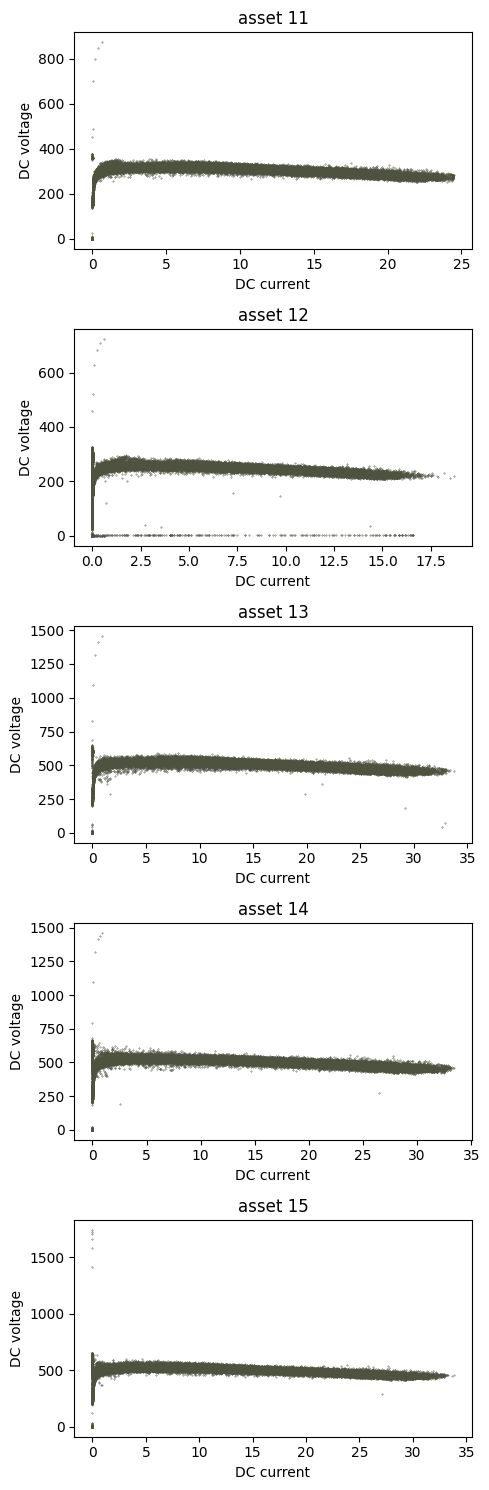

In [48]:
plot = 1
assets = df_solar["asset_id"].unique()[:5]
n_plots = 5
plt.figure(figsize=(5, n_plots*3))
for asset, subset in df_solar[df_solar["asset_id"].isin(assets)].groupby("asset_id"):
    plt.subplot(n_plots, 1, plot)
    plt.title(f"asset {asset}")
    plt.xlabel('DC current')
    plt.ylabel('DC voltage')
    plt.scatter(subset["dc_current"], subset["dc_voltage"], c="#4E5340", s=0.1)
    plot += 1
plt.tight_layout()
plt.show()

try a "logical" way to identify and remove outliers:

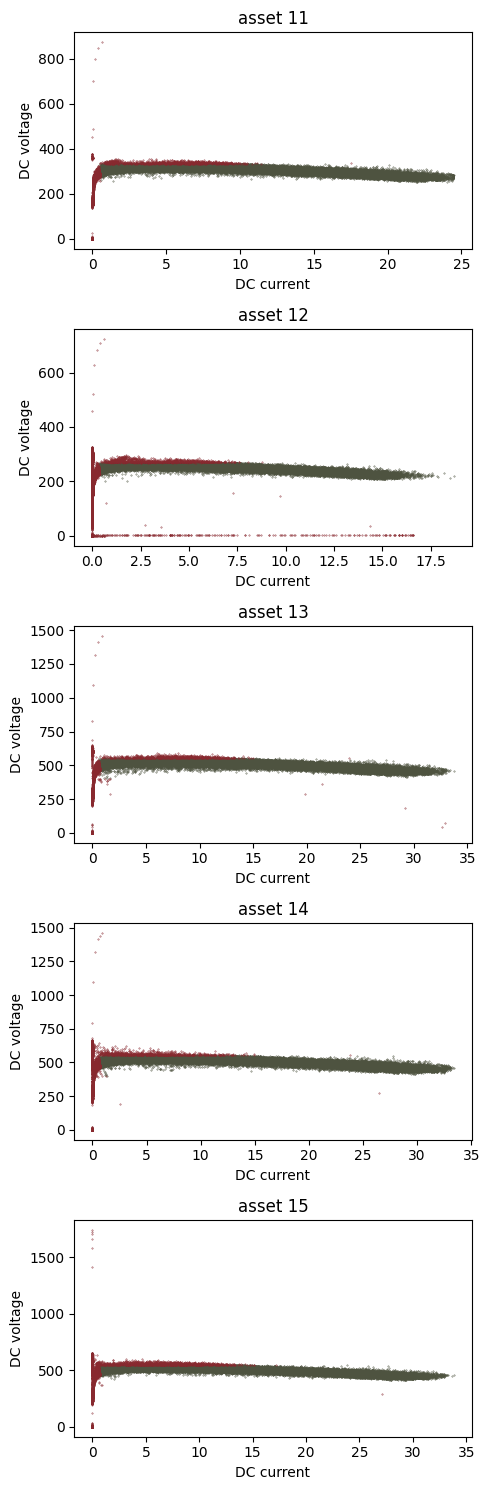

In [49]:
plot = 1
assets = df_solar["asset_id"].unique()[:5]
n_plots = 5
plt.figure(figsize=(5, n_plots*3))
for asset, subset in df_solar[df_solar["asset_id"].isin(assets)].groupby("asset_id"):
    plt.subplot(n_plots, 1, plot)
    plt.title(f"asset {asset}")
    plt.xlabel('DC current')
    plt.ylabel('DC voltage')
    _subset = subset[(subset["dc_power"] > subset["dc_power"].max()*0.02) & 
                     (subset["dc_voltage"] < (subset["dc_voltage"].median())*1.1) & 
                     (subset["dc_voltage"] > (subset["dc_voltage"].median())*0.80)]
    outliers = subset[~subset.index.isin(_subset.index)]
    plt.scatter(_subset["dc_current"], _subset["dc_voltage"], c="#4E5340", s=0.1)
    plt.scatter(outliers["dc_current"], outliers["dc_voltage"], c='#88292F', s=0.1)    
    plot += 1
plt.tight_layout()
plt.show()

test the DBSCAN method to identify outliers:

Number of outliers for Asset 11: 2164


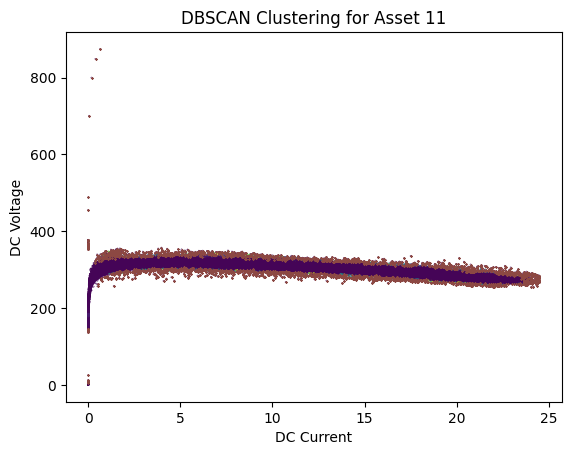

Number of outliers for Asset 12: 1338


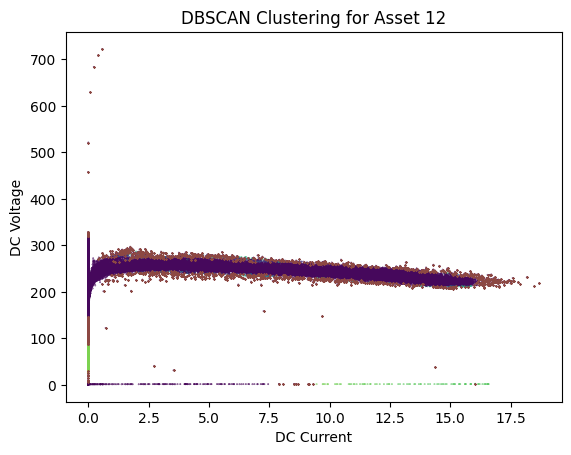

Number of outliers for Asset 13: 6232


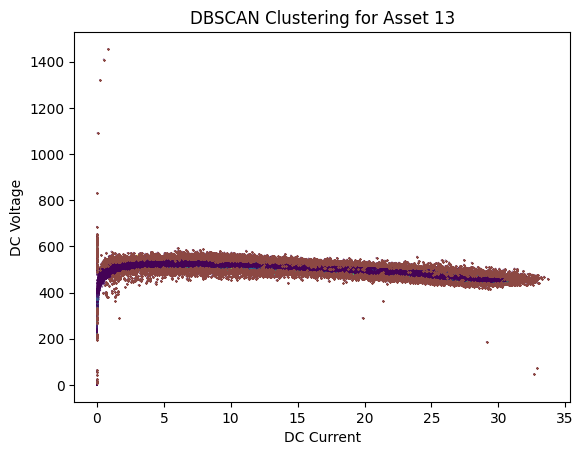

Number of outliers for Asset 14: 5964


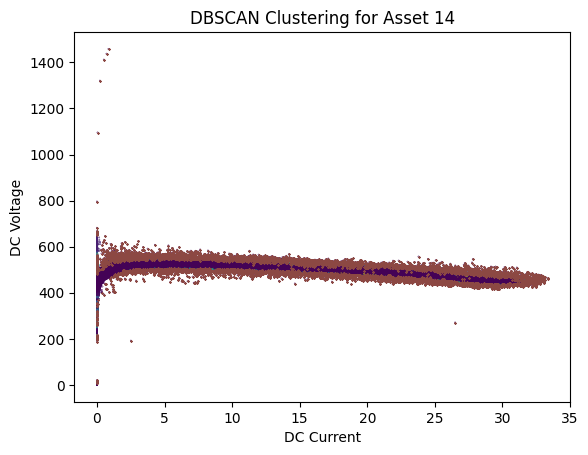

Number of outliers for Asset 15: 6285


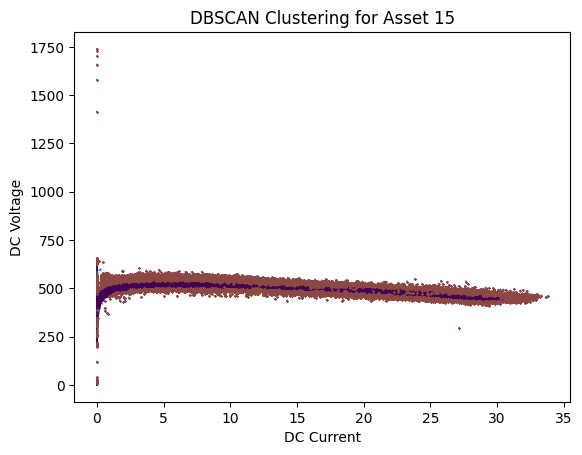

In [50]:
# Define the DBSCAN parameters
eps = 0.3
min_samples = 5

# Iterate over the first 5 assets
for asset_id in df_solar['asset_id'].unique()[:5]:
    # Filter the data for the current asset
    filtered_data = df_solar[df_solar['asset_id'] == asset_id][['dc_current', 'dc_voltage']]

    # Create the DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit the model to the data
    dbscan.fit(filtered_data)

    # Get the labels of the data points
    labels = dbscan.labels_

    # Identify the outliers
    outliers = np.where(labels == -1)[0]

    # Print the number of outliers
    print(f"Number of outliers for Asset {asset_id}:", len(outliers))

    # Plot the data with the outliers highlighted
    plt.scatter(filtered_data['dc_current'], filtered_data['dc_voltage'], c=labels, label = "Remaining Points" , s=0.1)
    plt.scatter(filtered_data.iloc[outliers, 0], filtered_data.iloc[outliers, 1], c="#8C4843", marker="x", label = "Outlier",s=1)
    plt.title(f'DBSCAN Clustering for Asset {asset_id}')
    plt.xlabel('DC Current')
    plt.ylabel('DC Voltage')
    plt.show()




test the robust covariance method to identify the outliers:

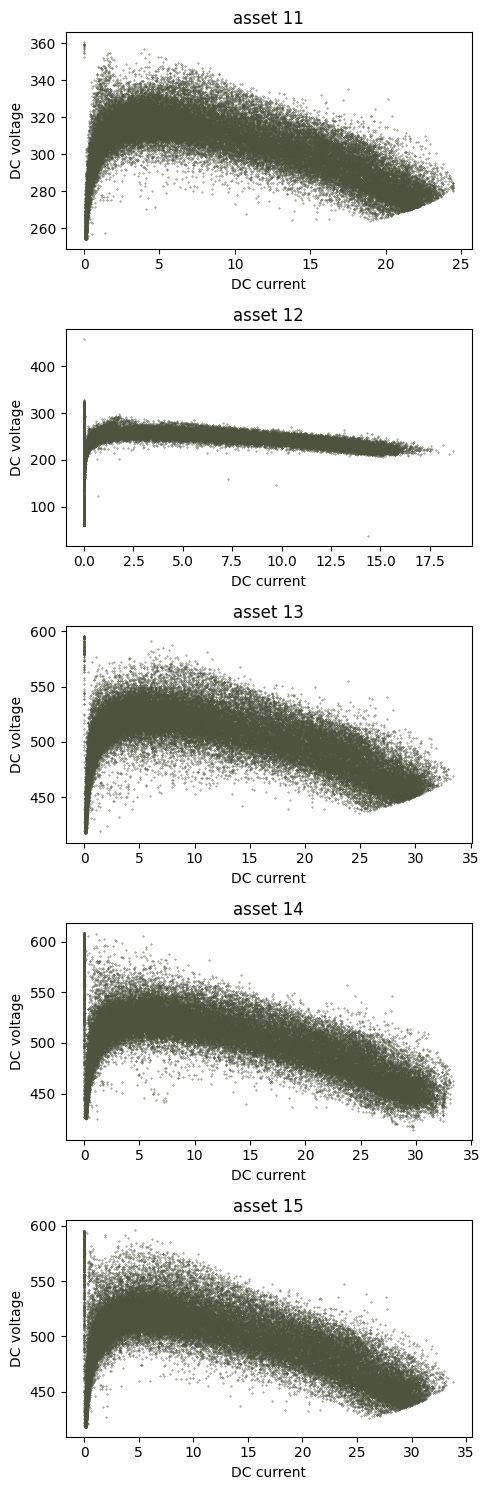

In [51]:
plot = 1
assets = df_solar["asset_id"].unique()[:5]
n_plots = 5
plt.figure(figsize=(5, n_plots*3))
for asset, subset in df_solar[df_solar["asset_id"].isin(assets)].groupby("asset_id"):
    plt.subplot(n_plots, 1, plot)
    plt.title(f"asset {asset}")
    plt.xlabel('DC current')
    plt.ylabel('DC voltage')
    
    # Fit the Elliptic Envelope
    robust_cov = EllipticEnvelope().fit(subset[["dc_current", "dc_voltage"]])
    
    # Detect outliers using the robust covariance
    outliers = robust_cov.predict(subset[["dc_current", "dc_voltage"]]) == -1
    
    # Filter the subset to exclude outliers
    _subset = subset[~outliers]
    
    plt.scatter(_subset["dc_current"], _subset["dc_voltage"], c="#4E5340", s=0.1)
    plot += 1

plt.tight_layout()
plt.show()


The robust covariance method cuts out data points that should not be considered as outliers, and took 1min and 12 secs to run just 5 assets

Apply DBSCAN to all df by finding the outliers by asset:

In [52]:
# Define the DBSCAN parameters
eps = 0.3
min_samples = 5

# Initialize an empty DataFrame to store the outliers
outliers_df = pd.DataFrame()

# Iterate over the unique asset IDs
for asset_id in df_solar['asset_id'].unique():
    # Filter the data for the current asset
    filtered_data = df_solar[df_solar['asset_id'] == asset_id][['dc_current', 'dc_voltage']]

    # Create the DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit the model to the data
    dbscan.fit(filtered_data)

    # Get the labels of the data points
    labels = dbscan.labels_

    # Identify the outliers
    outliers = np.where(labels == -1)[0]

    # Append the outliers to the outliers DataFrame
    outliers_df = pd.concat([outliers_df, filtered_data.iloc[outliers]])

# Output the outliers DataFrame
print(outliers_df)



         dc_current  dc_voltage
104          6.5930     301.433
129          2.1580     333.200
130          4.3030     290.667
313          2.1120     339.400
317          7.2900     333.133
...             ...         ...
4081691      0.0000     373.780
4081728      2.3190     560.260
4081729      2.7750     557.820
4081730      3.9180     557.860
4081739      1.8615     561.420

[456272 rows x 2 columns]


Filter the solar df to exclude the outliers by applying the DBSCAN to the entire df

In [53]:
# Initialize an empty DataFrame to store the filtered data
solar_without_out = pd.DataFrame()

# Group the DataFrame by "asset_id"
grouped = df_solar.groupby("asset_id")

# Iterate over each group
for asset_id, group_df in grouped:
    # Filter the data for the current asset
    filtered_data = group_df[['dc_current', 'dc_voltage']]

    median_dc_voltage = group_df["dc_voltage"].median()
    max_dc_power = group_df["dc_power"].max()

    # Create the DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit the model to the data
    dbscan.fit(filtered_data)

    # Get the labels of the data points
    labels = dbscan.labels_

    # Identify the outliers
    outliers = np.where(labels == -1)[0]

    # Apply the filtering conditions within each group, excluding outliers
    subset = group_df[(group_df["dc_power"] > group_df["dc_power"].max() * 0.02) & (~group_df.index.isin(outliers))& 
                       (group_df["dc_voltage"] < median_dc_voltage * 1.1) & 
                       (group_df["dc_voltage"] > median_dc_voltage * 0.80)]

    # Concatenate the filtered subset to the overall filtered DataFrame
    solar_without_out = pd.concat([solar_without_out, subset])


Confirm that the df was cleaned:

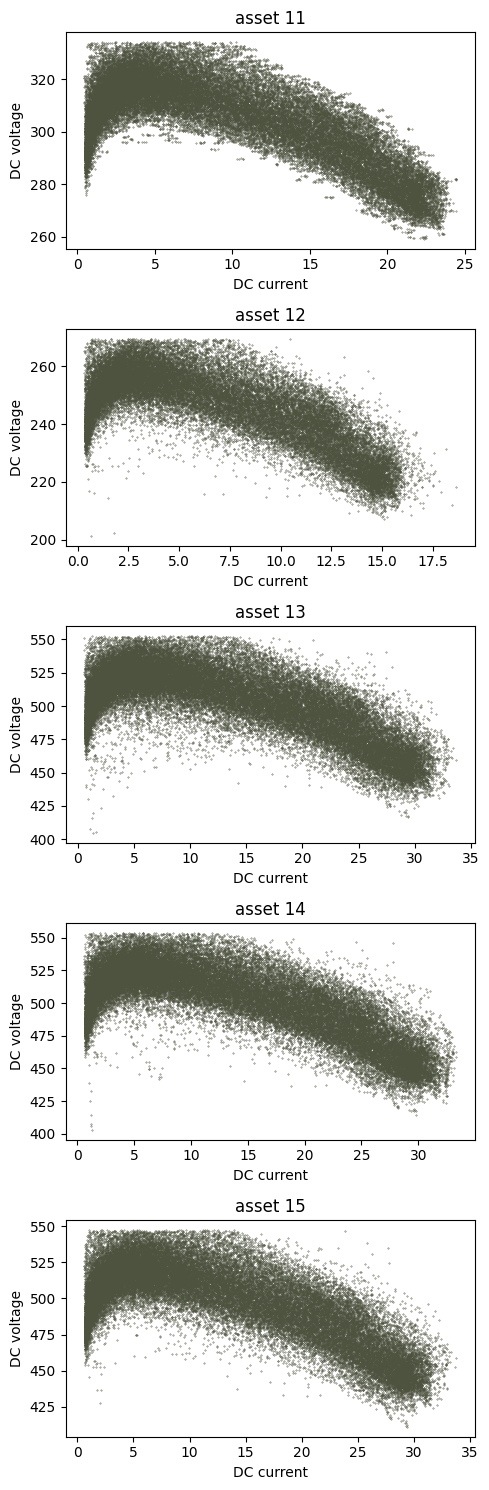

In [54]:
plot = 1
assets = solar_without_out["asset_id"].unique()[:5]
n_plots = 5
plt.figure(figsize=(5, n_plots*3))
for asset, subset in solar_without_out[solar_without_out["asset_id"].isin(assets)].groupby("asset_id"):
    plt.subplot(n_plots, 1, plot)
    plt.title(f"asset {asset}")
    plt.xlabel('DC current')
    plt.ylabel('DC voltage')
    plt.scatter(subset["dc_current"], subset["dc_voltage"], c="#4E5340", s=0.1)
    plot += 1
plt.tight_layout()
plt.show()

In [55]:
solar_without_out.to_csv("intermediate/solar_df.csv")

#### and
### Outliers for Wind 

wind speed vs power average

exterior temperature vs power average

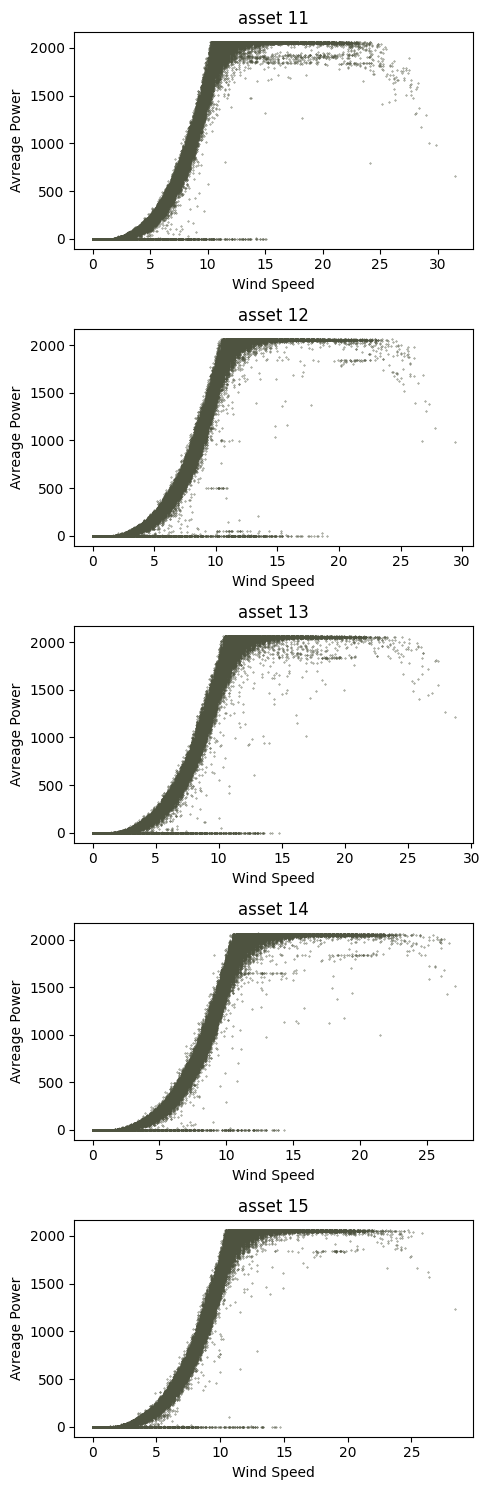

In [59]:
plot = 1
assets = df_wind["asset_id"].unique()[:5]
n_plots = 5
plt.figure(figsize=(5, n_plots*3))
for asset, subset in df_wind[df_wind["asset_id"].isin(assets)].groupby("asset_id"):
    plt.subplot(n_plots, 1, plot)
    plt.title(f"asset {asset}")
    plt.xlabel('Wind Speed')
    plt.ylabel('Avreage Power')
    plt.scatter(subset["wind_speed"], subset["power_average"], c="#4E5340", s=0.1)
    plot += 1
plt.tight_layout()
plt.show()

test the DBSCAN method to identify outliers:

Number of outliers for Asset 11: 2815


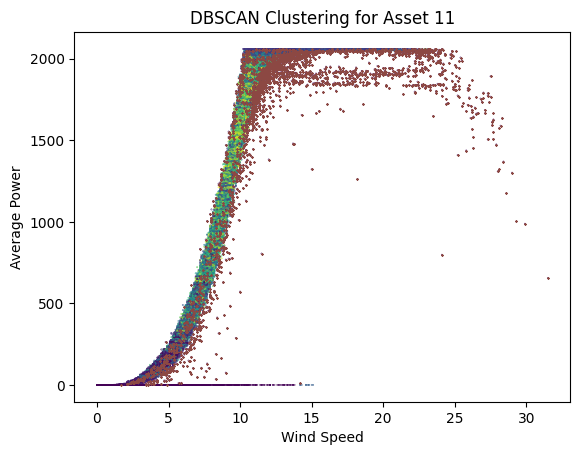

Number of outliers for Asset 12: 2189


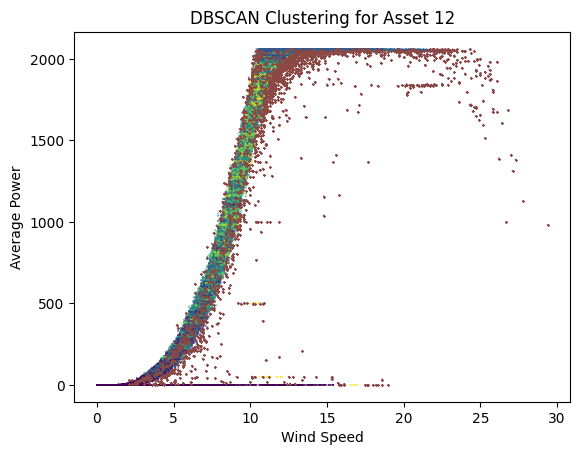

Number of outliers for Asset 13: 2544


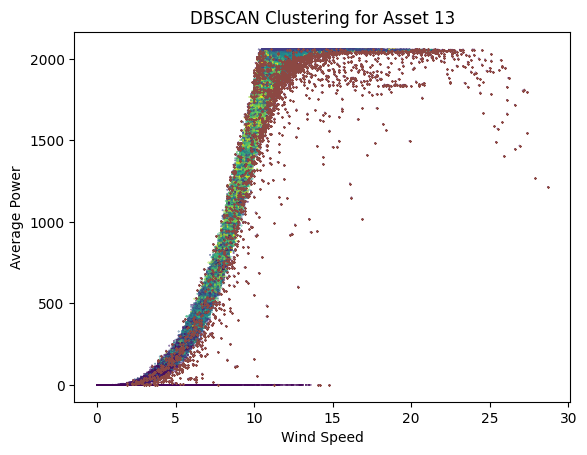

Number of outliers for Asset 14: 2287


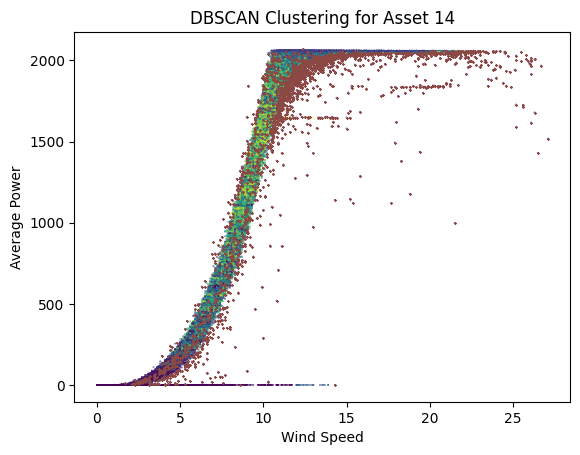

Number of outliers for Asset 15: 2021


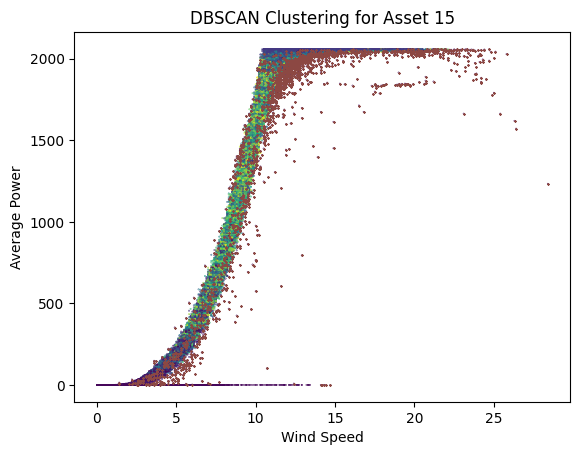

In [67]:
# Define the DBSCAN parameters
eps = 0.3
min_samples = 5

# Iterate over the first 5 assets
for asset_id in df_wind['asset_id'].unique()[:5]:
    # Filter the data for the current asset
    filtered_data = df_wind[df_wind['asset_id'] == asset_id][['wind_speed', 'power_average']]

    # Create the DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit the model to the data
    dbscan.fit(filtered_data)

    # Get the labels of the data points
    labels = dbscan.labels_

    # Identify the outliers
    outliers = np.where(labels == -1)[0]

    # Print the number of outliers
    print(f"Number of outliers for Asset {asset_id}:", len(outliers))

    # Plot the data with the outliers highlighted
    plt.scatter(filtered_data['wind_speed'], filtered_data['power_average'], c=labels, label = "Remaining Points" , s=0.1)
    plt.scatter(filtered_data.iloc[outliers, 0], filtered_data.iloc[outliers, 1], c="#8C4843", marker="x", label = "Outlier",s=1)
    plt.title(f'DBSCAN Clustering for Asset {asset_id}')
    plt.xlabel('Wind Speed')
    plt.ylabel('Average Power')
    plt.show()


Mean square deviation method:

In [3]:
with open("intermediate/dfs_dict.pickle", "rb") as f:
    dfs_dict = pickle.load(f)

df_wind = dfs_dict["Wind"]

/tmp/ipykernel_4918/2850954147.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_wind.groupby([wind_speed_intervals, "asset_id"])
/tmp/ipykernel_4918/2850954147.py:14: RuntimeWarning: invalid value encountered in scalar divide
  mean_square_deviation = np.sqrt(((group_df['power_average'] - mean_power) ** 2).sum() / (n - 1))


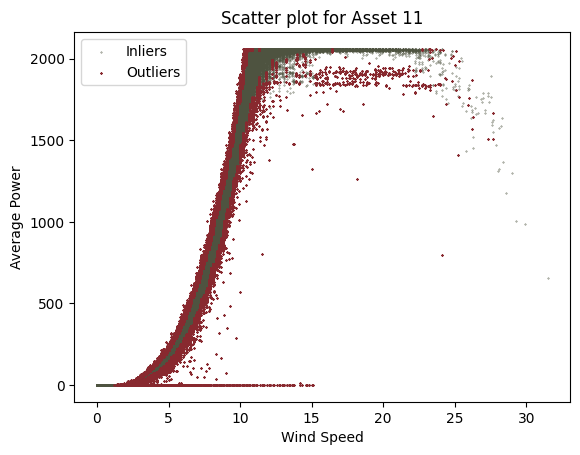

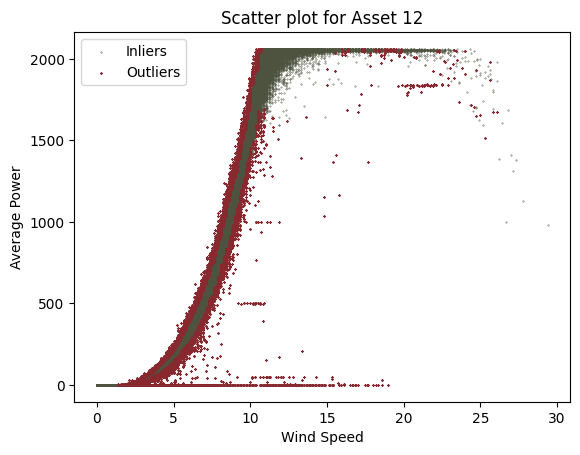

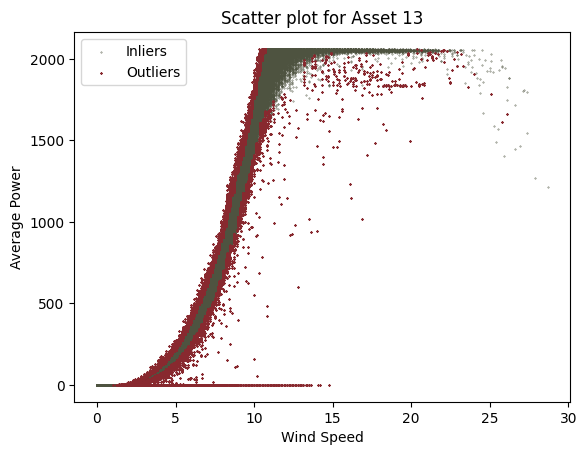

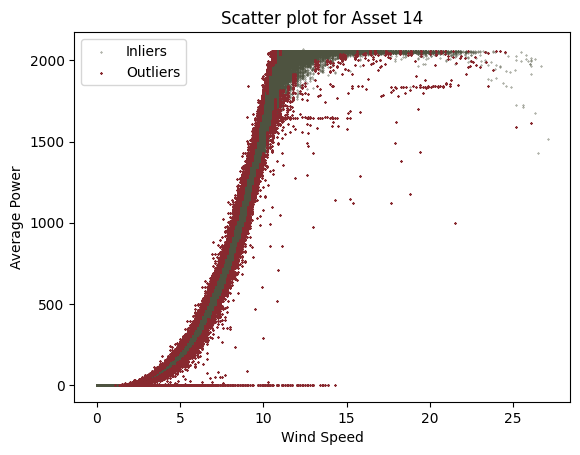

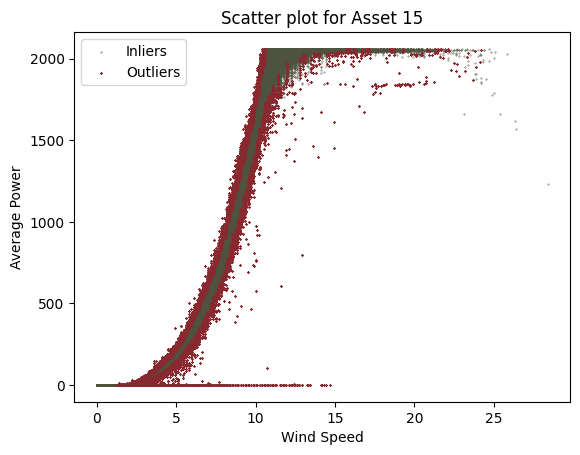

In [30]:
assets = df_wind["asset_id"].unique()[:5]

# Create an empty list to store outliers for each asset
outliers_list = []

# Group the data by wind speed intervals
wind_speed_intervals = pd.cut(df_wind['wind_speed'], bins=np.arange(0, df_wind['wind_speed'].max() + 0.1, 0.1))
grouped_df = df_wind.groupby([wind_speed_intervals, "asset_id"])

for (wind_speed_interval, asset_id), group_df in grouped_df:
    # Calculate mean power and within-group mean square deviation
    mean_power = group_df['power_average'].mean()
    n = len(group_df)
    mean_square_deviation = np.sqrt(((group_df['power_average'] - mean_power) ** 2).sum() / (n - 1))
    
    # Select the mean square deviation multiplier
    mean_sq_dev_multiplier = 1
    
    # Threshold for identifying outliers
    threshold = mean_sq_dev_multiplier * mean_square_deviation

    # Filter out outliers
    outliers = group_df[(group_df['power_average'] - mean_power).abs() > threshold]

    # Append outliers for each asset to the outliers list
    outliers_list.append(outliers)

# Plot the data points with outliers in a different color
inliers_df = df_wind.drop(pd.concat(outliers_list).index)

for asset_id in assets:
    asset_inliers = inliers_df[inliers_df["asset_id"] == asset_id]
    asset_outliers = pd.concat([outliers[outliers["asset_id"] == asset_id] for outliers in outliers_list])
    
    plt.scatter(asset_inliers["wind_speed"], asset_inliers["power_average"], c="#4E5340", s=0.1)
    plt.scatter(asset_outliers["wind_speed"], asset_outliers["power_average"], c="#88292F", s=1, marker="x")
    
    plt.title(f'Scatter plot for Asset {asset_id}')
    plt.xlabel('Wind Speed')
    plt.ylabel('Average Power')
    plt.legend(['Inliers', 'Outliers'])
    plt.show()
